# Swift Car image classifer : 

### 1.Data Collection and Augmentation :

- I manually downloaded all the cars images and renamed them as 'Swift' or 'Not Swift'.This process took me so long as I wanted to collect more and more data, so I was able to collect 1000 Swift images and 3000 Other cars images.

- I used Maruti Swift 360 modification tool in order to get the image from every angle.

- Then I divided my data into two categories, train and test.

- After this I performed ofline data augmentation on my data, so that my model can be accurate for every angle the image is taken. Horizontal flip and enlarging the images was the main part to do.

### 2. Data Importing and Label Mapping :

- For the processing of image data, I used OpenCV to read image data and resuze them accordingly. I resized each image into (256 x 256) pixels as this value works moderately good in all cases.

- Then I created an array that was contatining labels of each image as binary values.

### 3. Model building and evaluating :

- I used Tflearn for the simplicity of this project. Although it can be done with various techniques, I find tflearn high level, efficient and transparent to Tensorflow. TFlearn is made at the top of Tensorflow, so it has all the functions we need with very simple implemenation.

- I used AdamOptimizer for the optimization with learning_rate= 0.0001 and it is advanced version of Gradient Descent.

- I used the cost function as CrossEntropy which we want to minimize at every iteartion using our optimizer.

- I created 7 layers in total among them 5 were Convolutional with max_pooling, and other 2 were fully connected with activation function as 'Sigmoid' as we wanted to know the probability of the predicted image.

- After completing the traing and testing , my model gave me 98.25% accuracy 


In [1]:
# [IMPORTING LIBRARIES THAT WE USED]

import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion


%matplotlib inline
import matplotlib.pyplot as plt   
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

tf.reset_default_graph()     # this will reset the computation grapgh every time it runs




Instructions for updating:
Use the retry module or similar alternatives.
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
# [SETTING PATH FOR THE DATA DIRECTORIES]


#[TRAIN DATA DIRECTORY]

TRAIN_DIR =(r'C:\Users\SHIVAM-PC\Desktop\ImageClassifier\train')  

#[TEST DATA DIRECTORY]
TEST_DIR = (r'C:\Users\SHIVAM-PC\Desktop\ImageClassifier\test')



#[THIS IS THE PIXEL SIZE WE WANT THE IMAGE TO BE]
IMG_SIZE = 256

#[THIS IS THE LEARNING RATE FOR OUR OPTIMIZER TO FIND THE OPTIMAL SOLUTION FOR WEIGHTS AND BIASES]
LR = 0.0001

#[THIS JUST PROVIDES A MODEL NAME]
MODEL_NAME = ('SwiftClassifier-{}-{}.model'.format(LR, 'cnn-finalmodel')) # just so we remember which saved model is which, sizes must match

In [3]:
#[LABEL MAPPING FOR ECAH IMAGE]

def label_img(img):
    word_label = img.split('.')[-3]   
    # conversion to one-hot array [swift,not_swift]
    #                            
    if word_label == 'Swift': return [1,0] #[SWIFT IMAGE GIVES LABEL OF [1,0]]   
    #                             
    elif word_label == 'Not_Swift': return [0,1] #[NOT_SWIFT IMAGE GIVES LABEL AS [0,1] ]

In [4]:
#[FUNCTION TO PROCESS TRAIN DATA]

def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path)  # GRAYSCALING EACH IMAGE
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))     # RESIZING EACH IMAGE
        training_data.append([np.array(img),np.array(label)])     #COMBINING THE PIXEL DATA AND LABEL DATA FOR EACH IMAGE
    shuffle(training_data)                               # THIS WILL RANDOMLY SHUFFLE OUR DATA
    np.save('train_data.npy', training_data)
    return (training_data)

In [5]:
# [PROCESSING TEST DATA]

def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img = cv2.imread(path)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img)])
        
    shuffle(testing_data)
    np.save('test_data1.npy', testing_data)
    return (testing_data)

In [10]:
# [CREATING TRAIN_DATA WITH EACH IMAGE AS PIXEL DATA AND LABEL IN AN ARRAY]

train_data = create_train_data()
# If you have already created the dataset:
#train_data = np.load('train_data.npy')

100%|██████████████████████████████████████| 2086/2086 [00:45<00:00, 45.91it/s]


In [11]:
for i in train_data[:10]:
    print(i[1][0])
    

1
1
1
0
1
0
1
0
0
1


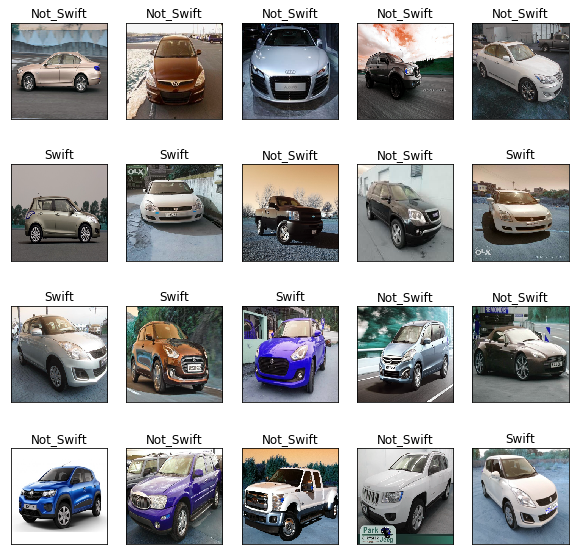

In [26]:
# if you already have some saved:
fig=plt.figure(figsize=[10,10])

for num,data in enumerate(train_data[240:260]):
    # swift: [1,0]
    # not_swift: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(4,5,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,3)
    
    if img_num[0] == 1 : str_label='Swift'
    else: str_label='Not_Swift'
        
    y.imshow(orig)
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [6]:
#[CEATING TEST_DATA WITH ARRAY COBINATION OF PIXEL AND LABEL]

test_data = process_test_data()


100%|██████████████████████████████████████████| 16/16 [00:00<00:00, 24.97it/s]


In [22]:
# TFLEARN MODELING USING conv2d layers with activation function as 'relu' :


#[inputting the data]
convnet = input_data(shape=[None,IMG_SIZE, IMG_SIZE , 3], name='input')


#1st layer , no. of filters = 32 , filter_size = 4 x 4
convnet = conv_2d(convnet, 32, 4, activation='relu')
convnet = max_pool_2d(convnet, 4)  # max_pooling with kernel size 4

# 2nd Layer
convnet = conv_2d(convnet, 64, 4, activation='relu')
convnet = max_pool_2d(convnet, 4)


#3rd layer with no. of filters = 128
convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 4)


#4th layer with no. of filters = 256
convnet = conv_2d(convnet, 256, 4, activation='relu')
convnet = max_pool_2d(convnet, 4)

#5th
convnet = conv_2d(convnet, 256, 4, activation='relu')
convnet = max_pool_2d(convnet, 4)


#6th layer which is fully connectedd with no. of neurons = 1024
convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

# final layer with activation function as softmax that is sigmoid function 
convnet = fully_connected(convnet, 2, activation='softmax')

# optimization with minimation of crossEntropy cost function
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

#creating model object
model = tflearn.DNN(convnet, tensorboard_dir='log')

    
# train and test data
train = train_data[:1800]
test = train_data[1800:]

#this is the pixel data for each image
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3) 

#this is the label data for each image
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
test_y = [i[1] for i in train]


# traing the model with no. of epochs =20
#model.fit({'input': X}, {'targets': Y}, n_epoch=30, validation_set=({'input': test_x}, {'targets': test_y}), 
#  snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

- Final Notes 

> This model only works for Swift but nor swift dzire

> I couldn't make a web application of my model as time limit was less, but i'll surely make it

> This is just a simple image classifier and a lot better approacches can be made 



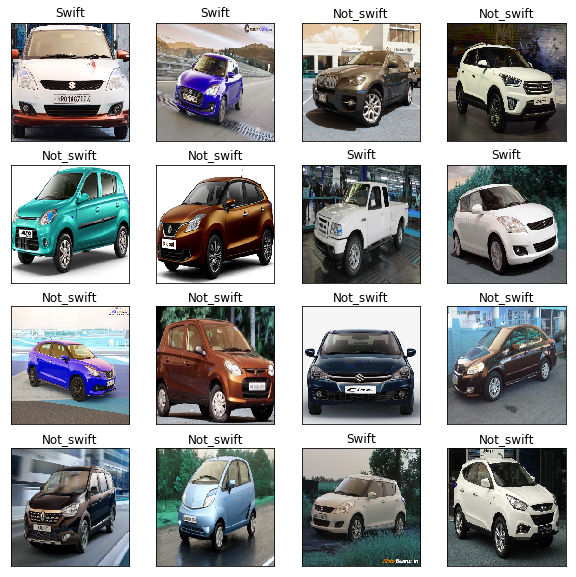

In [27]:
# if you already have some saved:
fig=plt.figure(figsize=[10,10])

for num,data in enumerate(test_data):
    # swift: [1,0]
    # not_swift: [0,1]
    
    img_data = data[0]
    
    y = fig.add_subplot(4,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,3)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Not_swift'
    else: str_label='Swift'
        
    y.imshow(orig)
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

> As we can see only 16th image is misclassified

In [23]:
model.load('swift_classifier.tflearn' , weights_only=True)

INFO:tensorflow:Restoring parameters from C:\Users\SHIVAM-PC\Desktop\ImageClassifier\swift_classifier.tflearn


In [21]:
tf.reset_default_graph()